# TP 2 - Introducción al aprendizaje automatizado
### Juan Ignacio Farizano

--------------------------------------------------------------------------------

In [2]:
# Imports iniciales
%matplotlib inline
import math
from common import *
from ann import *
from itertools import product
from copy import deepcopy
from sklearn.model_selection import train_test_split

--------------------------------------------------------------------------------
## Ejercicio 1

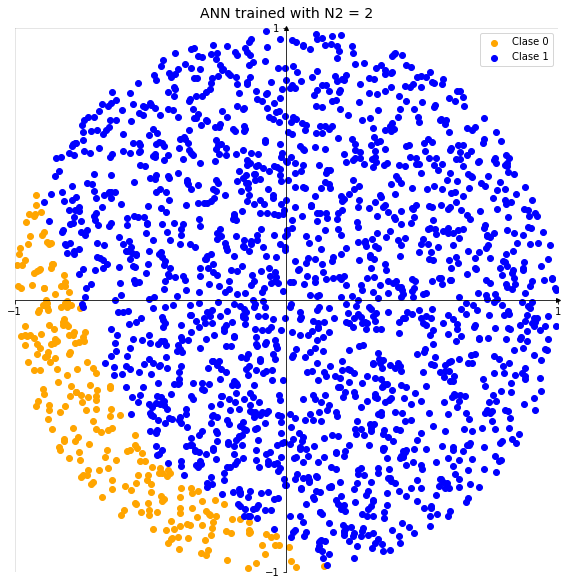

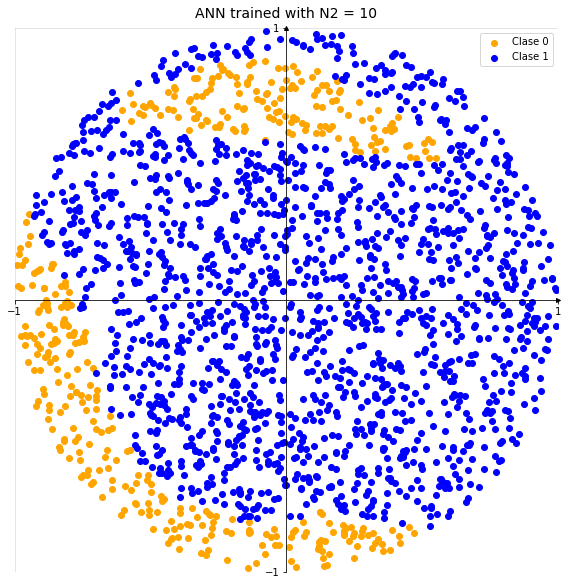

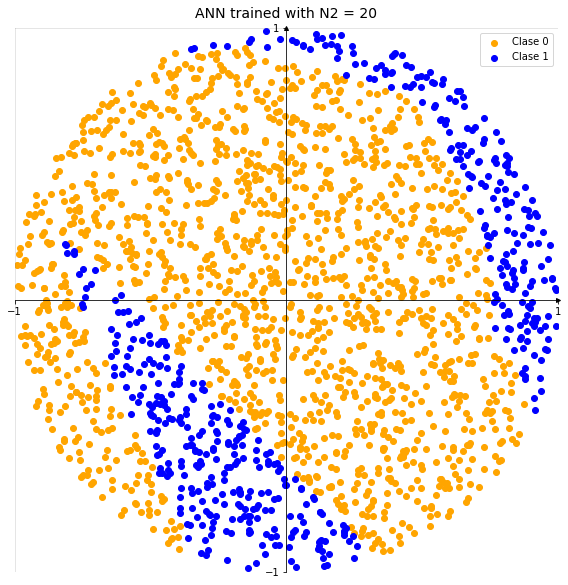

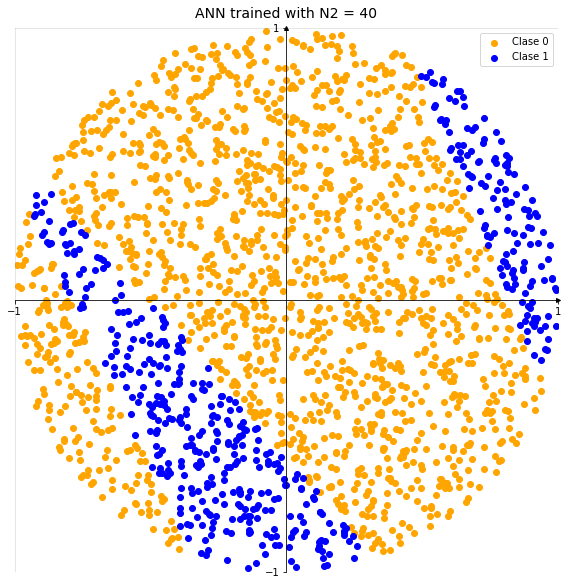

In [2]:
# Valores utilizados para crear la red neuronal
epochs=20 # numero de epocas que entrena cada vez
eta=0.1 # learning rate
alfa=0.9 # momentum
evals=1000 # evalauciones del entrenamiento

col_names = [0, 1, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Creo el conjunto de datos utilizado para entrenar y vaidar
df_data_spirals = generate_spirals(600)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_spirals[x_col_names], df_data_spirals[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

# Genero el conjunto de test
df_test_spirals = generate_spirals(2000)
X_test, y_test = df_test_spirals[x_col_names], df_test_spirals[y_col_name]

# Itero para cada cantidad de neuronas en la capa intermedia
for N2 in [2, 10, 20, 40]:
  # Creo la red neuronal
  classif = create_net_classifier(N2, eta, alfa, epochs)

  # La entreno con los conjuntos generados anteriormente
  best_net, e_train, e_val, e_test = train_net(classif, evals, X_train, y_train, X_val, y_val, X_test, y_test)
  
  # Predigo sobre el conjunto de test
  predict_test = best_net.predict(X_test)
  df_predict = df_test_spirals.copy(deep = True)
  df_predict['Class'] = predict_test

  # Grafico los resultados
  graph_df(df_predict, "ANN trained with N2 = {0}".format(N2))

### Conclusiones
A

--------------------------------------------------------------------------------
## Ejercicio 2

In [3]:
# Valores utilizados para crear la red neuronal
epochs=50 # numero de epocas que entrena cada vez
N2=6  # neuronas en la capa oculta
evals=300 # evalauciones del entrenamiento
etas=[0.1, 0.01, 0.001] # learning rate
alfas=[0, 0.5, 0.9] # momentum

col_names = [0, 1, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_elipses = pd.read_csv("datasets/elipses/dos_elipses.data", header=None, names = col_names)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_elipses[x_col_names], df_data_elipses[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

# Leo el conjunto de test
df_test_elipses = pd.read_csv("datasets/elipses/dos_elipses.test", header=None, names = col_names)
X_test, y_test = df_test_elipses[x_col_names], df_test_elipses[y_col_name]

best_mean_test_error = math.inf
table = []

# Itero para cada combinación de learning rate y momentum
for (eta, alfa) in [(e, a) for e in etas for a in alfas]:
  train_errors = []
  val_errors = []
  test_errors = []

  # Para cada combinación realizo 10 entrenamientos iguales
  for i in range(10):
    # Creo la red neuronal
    classif = create_net_classifier(N2, eta, alfa, epochs)
  
    # La entreno con los conjuntos generados anteriormente
    best_net, e_train, e_val, e_test = train_net(classif, evals, X_train, y_train, X_val, y_val, X_test, y_test)

    # Junto todos los errores en listas 2d donde hay una fila por cada una de las
    # 10 redes y las columnas son los errores por etapa
    train_errors.append(e_train)
    val_errors.append(e_val)
    test_errors.append(e_test)

  train_errors = np.asarray(train_errors)
  val_errors = np.asarray(val_errors)
  test_errors = np.asarray(test_errors)
  
  # Calculo los promedios de los errores por cada etapa (columna)
  mean_train_errors = train_errors.mean(axis = 0)
  mean_val_errors = val_errors.mean(axis = 0)
  mean_test_errors = test_errors.mean(axis = 0)

  # Busco el mínimo error de validación (y su índice) entre los promedios por cada etapa
  min_val_error = np.min(mean_val_errors)
  index_min_val_error = np.where(mean_val_errors == min_val_error)[0][0]

  # Para la etapa del mínimo error de validación busco su error de test
  mean_min_test_error = mean_test_errors[index_min_val_error]

  # Si es el mínimo error de test hasta ahora lo guardo junto a su eta, alfa
  # y datos de errores correspondientes
  if mean_min_test_error < best_mean_test_error:
    best_mean_test_error = mean_min_test_error
    best_eta = eta
    best_alfa = alfa
    # Guardo estos errores para graficarlos luego
    best_train_errors = np.copy(mean_train_errors)
    best_val_errors = np.copy(mean_val_errors)
    best_test_errors = np.copy(mean_test_errors)

  # Guardo la combinación eta, alfa con su error de test calculado antes
  table.append([eta, alfa, mean_min_test_error])

errors = []

for i in range(evals):
  errors.append([best_train_errors[i], i * epochs, "Train error"])
  errors.append([best_val_errors[i], i * epochs, "Validation error"])
  errors.append([best_test_errors[i], i * epochs, "Test error"])

ej3_errors_df = pd.DataFrame(errors, columns = ["Error", "Epocas", "Class"])
ej3_errors_df.to_csv("datasets/etas_alfas/ann_etas_alfas_errors.csv", index = False)

ej3_errors_table_df = pd.DataFrame(table, columns = ["Learning rate", "Momentum", "Mean test error"])
ej3_errors_table_df.to_csv("datasets/etas_alfas/ann_etas_alfas_table.csv", index = False)
print("Mejor eta: {0} mejor alfa: {1} with test de error promedio: {2}".format(best_eta, best_alfa, best_mean_test_error))
ej3_errors_table_df

Mejor eta: 0.01 mejor alfa: 0.9 with test de error promedio: 0.02679999999999998


,Learning rate,Momentum,Mean test error
0,0.100,0.0,0.04770
1,0.100,0.5,0.04555
2,0.100,0.9,0.09390
3,0.010,0.0,0.23290
4,0.010,0.5,0.11235
5,0.010,0.9,0.02680
6,0.001,0.0,0.24350
7,0.001,0.5,0.24350
8,0.001,0.9,0.22685


Mejor eta: 0.01 mejor alfa: 0.9 with test de error promedio: 0.02679999999999998


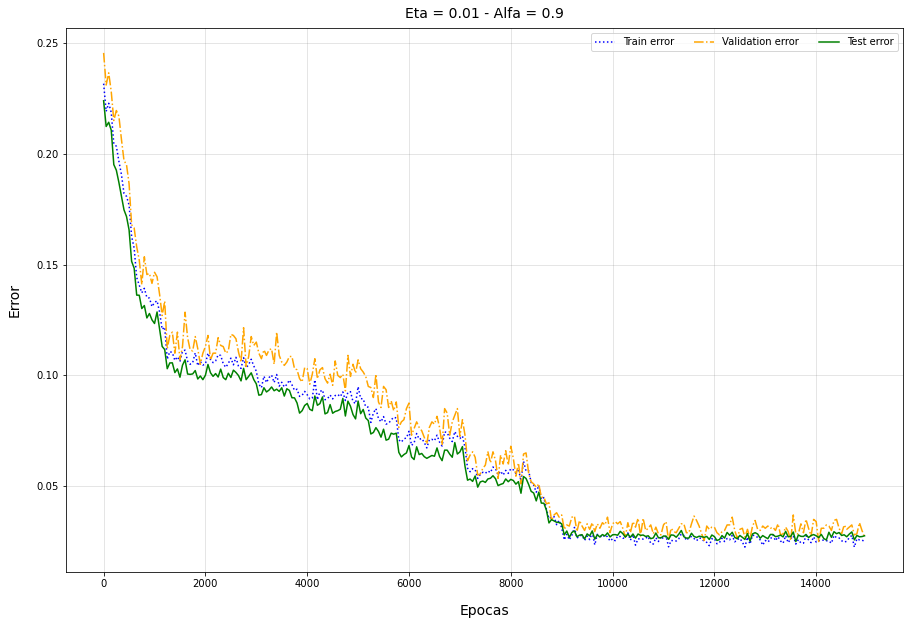

In [3]:
errors_df = pd.read_csv("datasets/etas_alfas/ann_etas_alfas_errors.csv")
graph_errors(errors_df, 'Epocas', title = "Eta = 0.01 - Alfa = 0.9")

### Conclusiones
b

--------------------------------------------------------------------------------
## Ejercicio 3

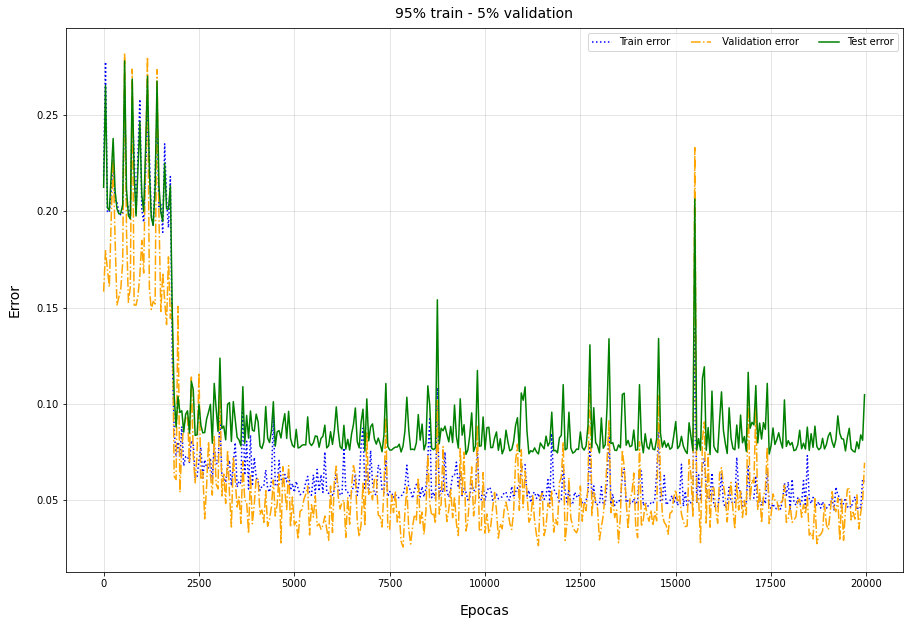

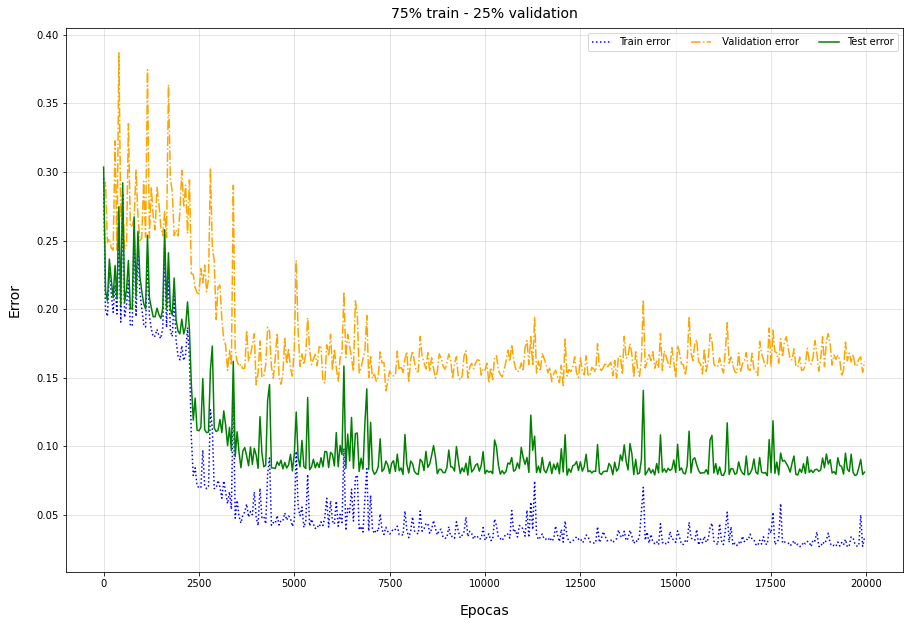

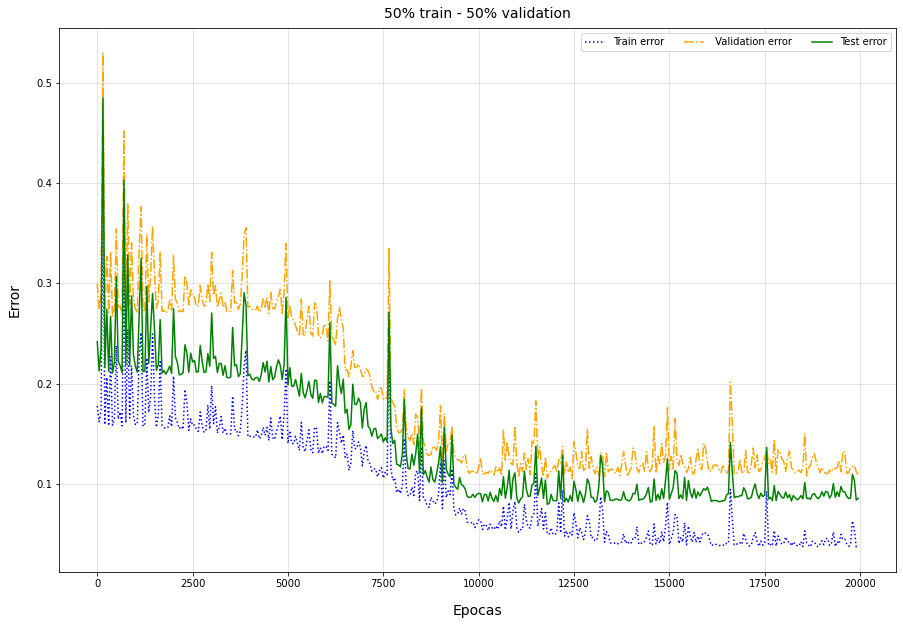

In [5]:
# Valores utilizados para crear la red neuronal
epochs=50 # numero de epocas que entrena cada vez
N2=30  # neuronas en la capa oculta
evals=400 # evalauciones del entrenamiento
eta=0.01 # learning rate
alfa=0.9 # momentum

col_names = list(range(5)) + ['Value']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y validar
df_data_ikeda = pd.read_csv("datasets/ikeda/ikeda.data", header=None, names = col_names, delim_whitespace=True, skipinitialspace=True)
# Leo el conjunto de test
df_test_ikeda = pd.read_csv("datasets/ikeda/ikeda.test", header=None, names = col_names, delim_whitespace=True, skipinitialspace=True)
X_test, y_test = df_test_ikeda[x_col_names], df_test_ikeda[y_col_name]

for val_size in [0.05, 0.25, 0.5]:
  errors = []
  # Separo al azar para conjunto de validación
  X, y = df_data_ikeda[x_col_names], df_data_ikeda[y_col_name]
  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=val_size)

  # Creo la red neuronal
  regr = create_net_regressor(N2, eta, alfa, epochs)
  # La entreno con los conjuntos generados anteriormente
  best_net, e_train, e_val, e_test = train_net(regr, evals, X_train, y_train, X_val, y_val, X_test, y_test)
  
  for i in range(evals):
    errors.append([e_train[i], i * epochs, "Train error"])
    errors.append([e_val[i], i * epochs, " Validation error"])
    errors.append([e_test[i], i * epochs, "Test error"])

  errors_df = pd.DataFrame(errors, columns = ["Error", "Epocas", "Class"])
  graph_errors(errors_df, "Epocas", title = "{0}% train - {1}% validation".format(int((1 - val_size) * 100), int(val_size * 100)))


### Conclusiones
b

--------------------------------------------------------------------------------
## Ejercicio 4

In [6]:
# Valores utilizados para crear la red neuronal
epochs=20 # numero de epocas que entrena cada vez
N2=6  # neuronas en la capa oculta
evals=4000 # evalauciones del entrenamiento
eta=0.05 # learning rate
alfa=0.3 # momentum


col_names=list(range(12)) + ['Value']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_train_ssp = pd.read_csv("datasets/ssp/ssp.data", header=None, names = col_names)
# Leo el conjunto de test
df_test_ssp = pd.read_csv("datasets/ssp/ssp.test", header=None, names = col_names)

# Separo los conjuntos de entrenamiento y test en conjuntos
# de datos de entrada y con las respuestas.
X_train, y_train = df_train_ssp[x_col_names], df_train_ssp[y_col_name]
X_test, y_test = df_test_ssp[x_col_names], df_test_ssp[y_col_name]

gammas = [10 ** i for i in range(-6, 1)] # weight-decays

table = []
best_error_test = math.inf

for gamma in gammas:
  # Creo la red neuronal
  regr = create_net_regressor(N2, eta, alfa, epochs, gamma)

  # La entreno con los conjuntos generados anteriormente
  errors = []
  weights = []

  for i in range(evals):
    regr.fit(X_train, y_train)

    squared_sum_weights = sum(map(lambda a : np.sum(np.power(a, 2)), regr.coefs_))

    predict_train = regr.predict(X_train)
    predict_test = regr.predict(X_test)

    actual_error_train = sk.metrics.mean_squared_error(y_train, predict_train)
    actual_error_test = sk.metrics.mean_squared_error(y_test, predict_test)  

    errors.append([actual_error_train, i * epochs, "Train error"])
    errors.append([actual_error_test, i * epochs, "Test error"])
    weights.append([i * epochs, squared_sum_weights])

  table.append([gamma, actual_error_train, actual_error_test])
  
  if actual_error_test < best_error_test:
    best_error_test = actual_error_test
    best_gamma = gamma
    best_sum_weight = squared_sum_weights
    best_errors_df = pd.DataFrame(errors, columns = ["Error", "Epocas", "Class"])
    best_weights_df = pd.DataFrame(weights, columns = ["Epocas", "Pesos"])

ej4_errors_table_df = pd.DataFrame(table, columns = ["Gamma", "Train error", "Test error"])
ej4_errors_table_df.to_csv("datasets/gammas/ann_gammas_table.csv", index = False)
best_errors_df.to_csv("datasets/gammas/ann_gammas_errors.csv", index = False)
best_weights_df.to_csv("datasets/gammas/ann_gammas_weights.csv", index = False)
print("Mejor gamma: {0} con error de test: {1} y suma de pesos al cuadrado: {2}".format(best_gamma, best_error_test, best_sum_weight))
ej4_errors_table_df

Mejor gamma: 0.0001 con error de test: 0.005310874129426363 y suma de pesos al cuadrado: 17.04765243986654


,Gamma,Train error,Test error
0,0.000001,0.004338,0.006685
1,0.000010,0.003774,0.005656
2,0.000100,0.004912,0.005311
3,0.001000,0.008037,0.007577
4,0.010000,0.024579,0.021748
5,0.100000,0.043161,0.040230
6,1.000000,0.042461,0.038527


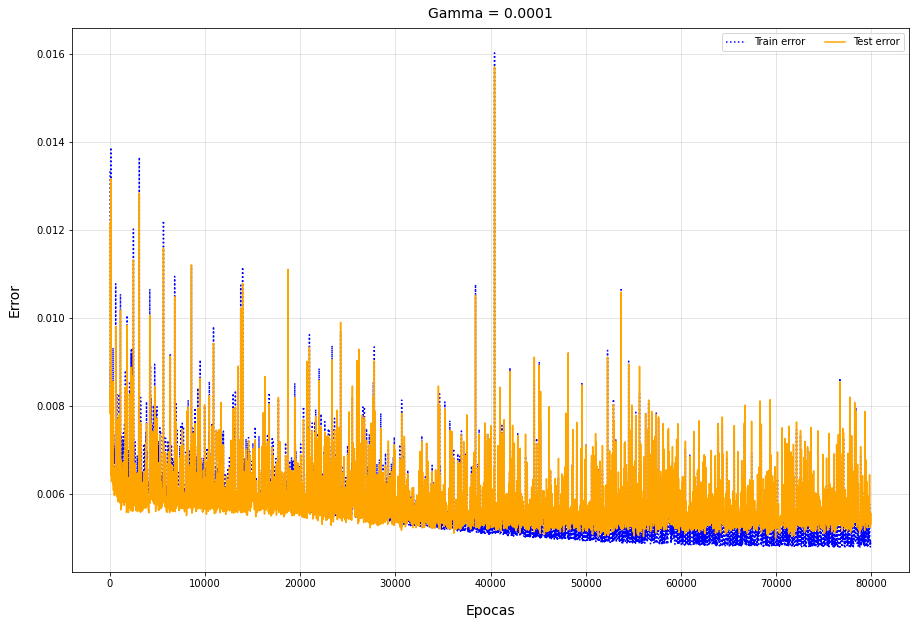

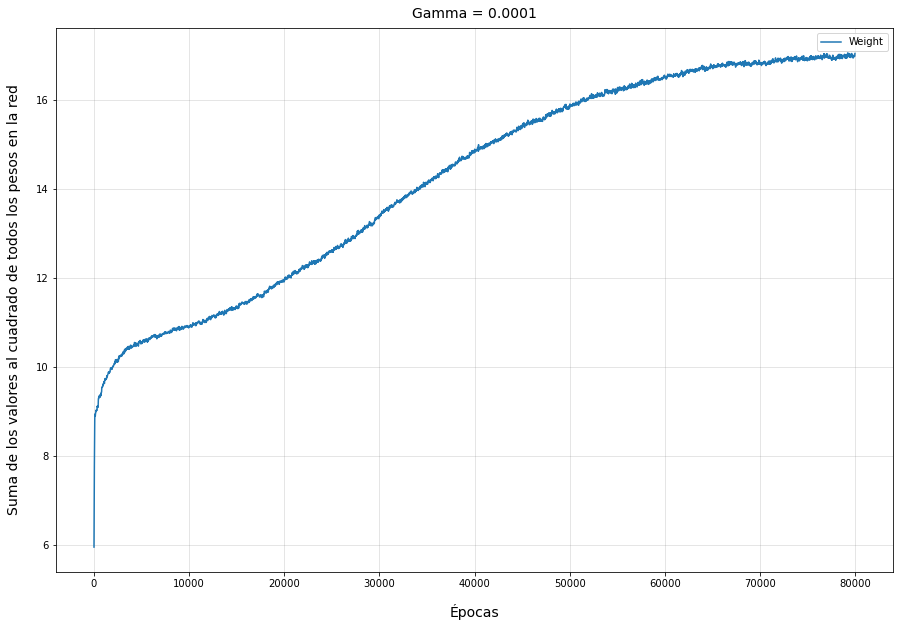

In [2]:
errors_df = pd.read_csv("datasets/gammas/ann_gammas_errors.csv")
weights_df = pd.read_csv("datasets/gammas/ann_gammas_weights.csv")

graph_errors(errors_df, 'Epocas', title = "Gamma = 0.0001")
graph_weights(weights_df, 'Epocas', title = "Gamma = 0.0001")

### Conclusiones
b

--------------------------------------------------------------------------------
## Ejercicio 5

In [8]:
# Valores utilizados para crear la red neuronal
epochs=50 # numero de epocas que entrena cada vez
N2=6  # neuronas en la capa oculta
evals=400 # evalauciones del entrenamiento
eta=0.01 # learning rate
alfa=0.9 # momentum
gamma=10 ** -5 # weight-decay

errors = []

for d in [2 ** i for i in range(1, 6)]:
  x_col_names = list(range(d))
  y_col_name = 'Class'

  # Genero los conjuntos de test para cada d
  df_test_diag = generate_diagonal(d, 10000, 0.78)
  df_test_para = generate_parallel(d, 10000, 0.78)

  X_test_diag, y_test_diag = df_test_diag[x_col_names], df_test_diag[y_col_name]
  X_test_para, y_test_para = df_test_para[x_col_names], df_test_para[y_col_name]

  for i in range(20):
    # Genero los conjuntos de entrenamiento
    df_train_diag = generate_diagonal(d, 250, 0.78)
    df_train_para = generate_parallel(d, 250, 0.78)

    X_train_diag, y_train_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
    X_train_para, y_train_para = df_train_para[x_col_names], df_train_para[y_col_name]

    # Creo las redes neuronales
    classif_diag = create_net_classifier(N2, eta, alfa, epochs, gamma)
    classif_para = create_net_classifier(N2, eta, alfa, epochs, gamma)

    for i in range(evals):
      classif_diag.fit(X_train_diag, y_train_diag)
      classif_para.fit(X_train_para, y_train_para)

    predict_train_diag = classif_diag.predict(X_train_diag)
    predict_test_diag = classif_diag.predict(X_test_diag)
    predict_train_para = classif_para.predict(X_train_para)
    predict_test_para = classif_para.predict(X_test_para)

    actual_error_train_diag = sk.metrics.zero_one_loss(y_train_diag, predict_train_diag)
    actual_error_test_diag = sk.metrics.zero_one_loss(y_test_diag, predict_test_diag)  
    actual_error_train_para = sk.metrics.zero_one_loss(y_train_para, predict_train_para)
    actual_error_test_para = sk.metrics.zero_one_loss(y_test_para, predict_test_para)

    errors.append([actual_error_train_diag, d, "ANN - Train diagonal"])
    errors.append([actual_error_test_diag, d, "ANN - Test diagonal"])
    errors.append([actual_error_train_para, d, "ANN - Train parallel"])
    errors.append([actual_error_test_para, d, "ANN - Test parallel"])

ej5_errors_ann_df = pd.DataFrame(errors, columns = ["Error", "d", "Class"])
ej5_errors_ann_df.to_csv("datasets/dimensions/ann_dimensions_errors.csv", index = False)

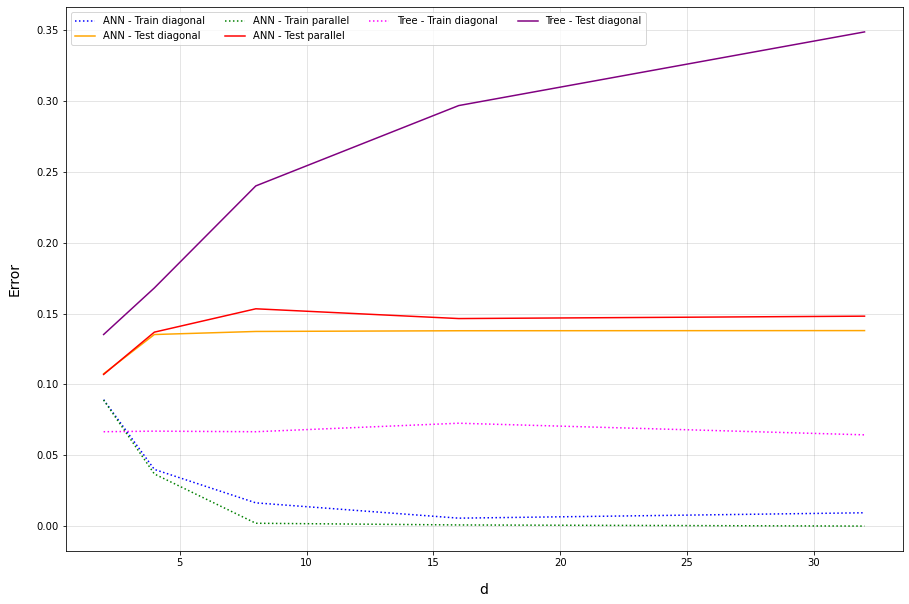

In [5]:
ej5_errors_ann_df = pd.read_csv("datasets/dimensions/ann_dimensions_errors.csv")
ej5_errors_tree_df = pd.read_csv("datasets/dimensions/tree_dimensions_errors.csv")
ej5_errors_df = pd.concat([ej5_errors_ann_df, ej5_errors_tree_df])
graph_errors(ej5_errors_df, "d")

### Conclusiones
b

--------------------------------------------------------------------------------
## Ejercicio 6

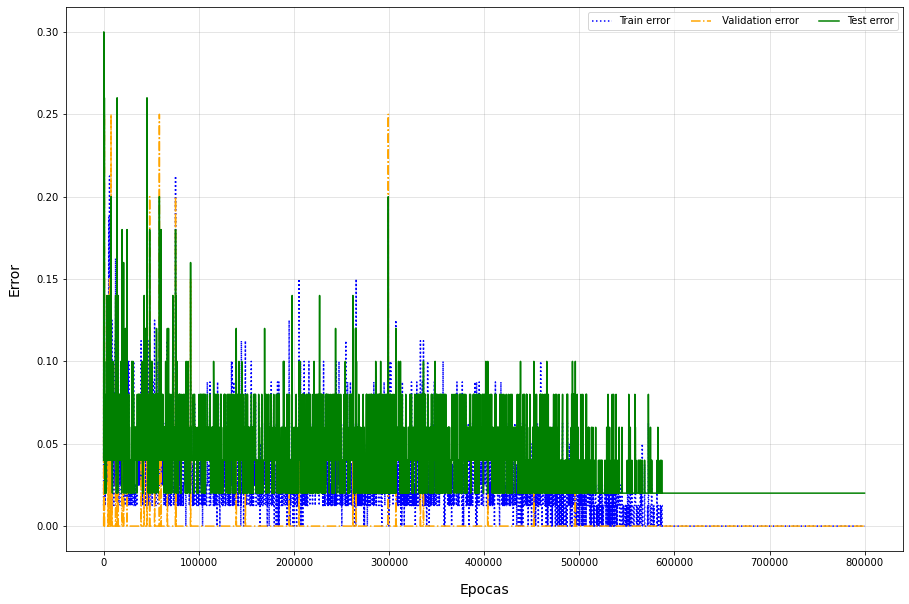

In [7]:
from sklearn.datasets import load_iris

epochs=200 # numero de epocas que entrena cada vez
N2=6  # neuronas en la capa oculta
evals=4000 # evalauciones del entrenamiento
eta=0.01 # learning rate
alfa=0.9 # momentum

iris = load_iris()
X = iris.data
y = iris.target
X_data, X_test, y_data, y_test = train_test_split(X, y, random_state=0, test_size = 1/3)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=0, test_size = 0.2)

# Creo la red neuronal
classif = create_net_classifier(N2, eta, alfa, epochs)

# La entreno con los conjuntos generados anteriormente
best_net, e_train, e_val, e_test = train_net(classif, evals, X_train, y_train, X_val, y_val, X_test, y_test)

errors = []

for i in range(evals):
    errors.append([e_train[i], i * epochs, "Train error"])
    errors.append([e_val[i], i * epochs, " Validation error"])
    errors.append([e_test[i], i * epochs, "Test error"])

errors_df = pd.DataFrame(errors, columns = ["Error", "Epocas", "Class"])
graph_errors(errors_df, "Epocas")

### Conclusiones
b

--------------------------------------------------------------------------------
## Ejercicio 6 bis

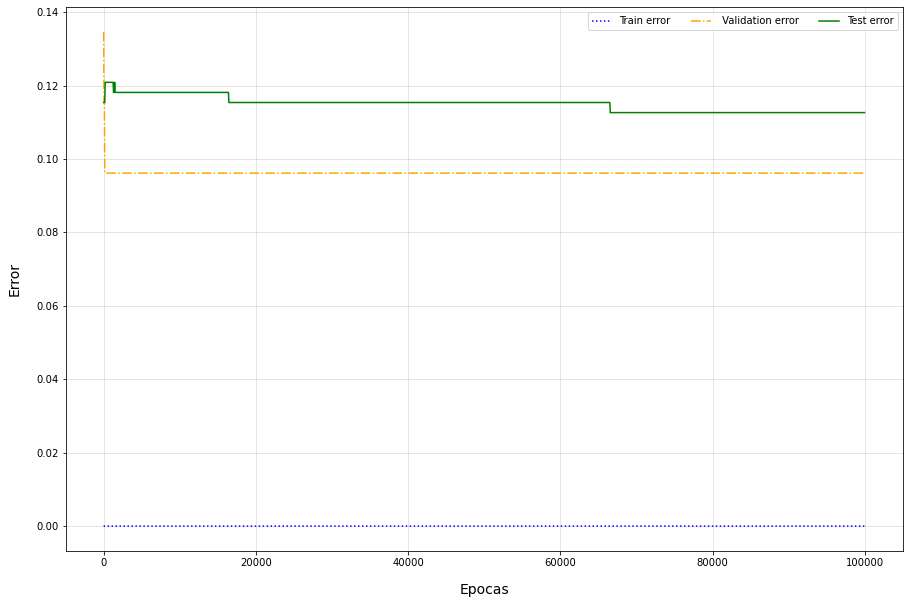

In [4]:
epochs=50 # numero de epocas que entrena cada vez
N2=6  # neuronas en la capa oculta
evals=2000 # evalauciones del entrenamiento
eta=0.01 # learning rate
alfa=0.9 # momentum

col_names = list(range(960)) + ['Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y validar
df_data_faces = pd.read_csv("datasets/faces/faces.data", header=None, names = col_names)
# Leo el conjunto de test
df_test_faces = pd.read_csv("datasets/faces/faces.test", header=None, names = col_names)

max_value = max(df_data_faces.max().max(), df_test_faces.max().max())

X_data, y_data = df_data_faces[x_col_names], df_data_faces[y_col_name]
X_test, y_test = df_test_faces[x_col_names], df_test_faces[y_col_name]

X_data, X_test = X_data / max_value , X_test / max_value

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=0, test_size=0.2)

# Creo la red neuronal
classif = create_net_classifier(N2, eta, alfa, epochs)

# La entreno con los conjuntos generados anteriormente
best_net, e_train, e_val, e_test = train_net(classif, evals, X_train, y_train, X_val, y_val, X_test, y_test)

errors = []

for i in range(evals):
    errors.append([e_train[i], i * epochs, "Train error"])
    errors.append([e_val[i], i * epochs, " Validation error"Q])
    errors.append([e_test[i], i * epochs, "Test error"])

errors_df = pd.DataFrame(errors, columns = ["Error", "Epocas", "Class"])
graph_errors(errors_df, "Epocas")

### Conclusiones
b

--------------------------------------------------------------------------------
## Ejercicio 7

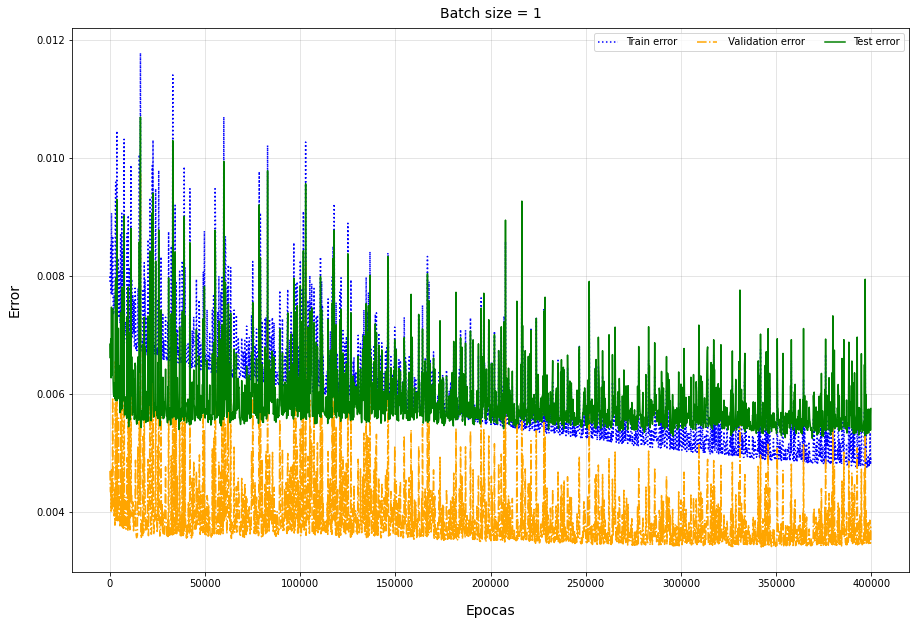

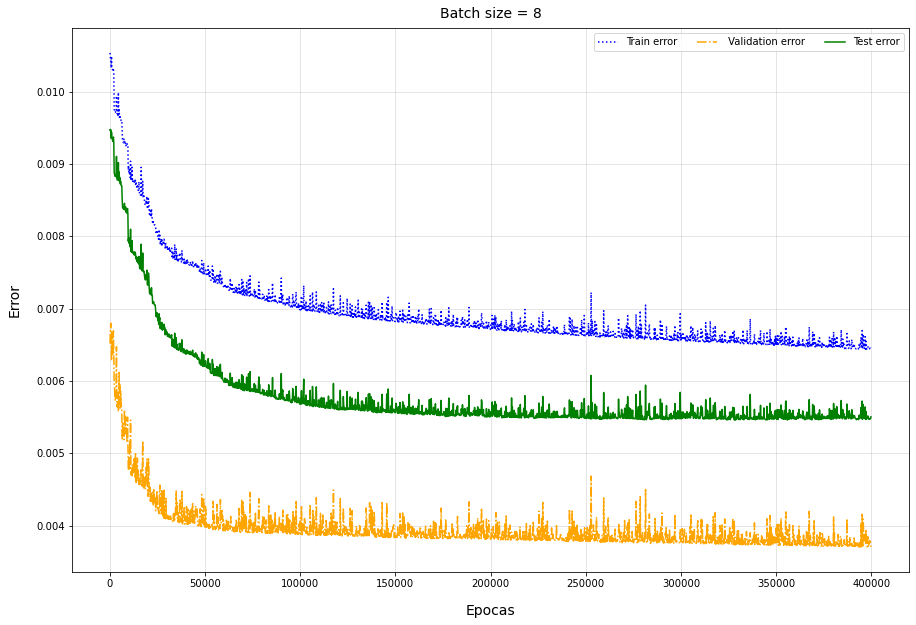

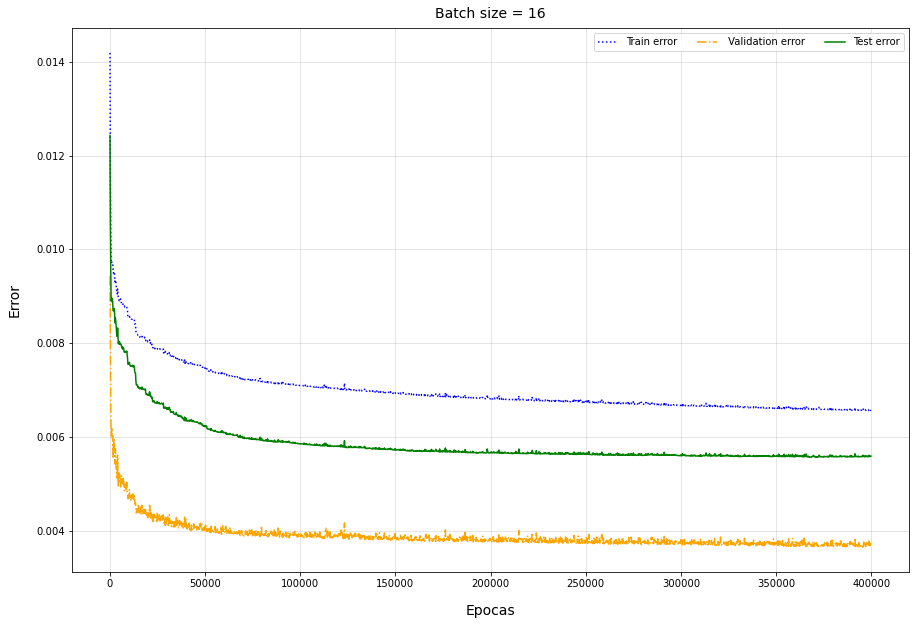

In [4]:
# Valores utilizados para crear la red neuronal
epochs=200 # numero de epocas que entrena cada vez
N2=6  # neuronas en la capa oculta
evals=2000 # evalauciones del entrenamiento
eta=0.05 # learning rate
alfa=0.3 # momentum

batches = [1, 8, 16]

col_names=list(range(12)) + ['Value']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_ssp = pd.read_csv("datasets/ssp/ssp.data", header=None, names = col_names)
# Leo el conjunto de test
df_test_ssp = pd.read_csv("datasets/ssp/ssp.test", header=None, names = col_names)

# Separo los conjuntos de entrenamiento, validación y test en conjuntos
# de datos de entrada y con las respuestas.
X, y = df_data_ssp[x_col_names], df_data_ssp[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)
X_test, y_test = df_test_ssp[x_col_names], df_test_ssp[y_col_name]


best_error_test = math.inf

for batch in batches:
  errors = []
  # Creo la red neuronal
  regr = create_net_regressor(N2, eta, alfa, epochs, batch = batch)
  best_net, e_train, e_val, e_test = train_net(regr, evals, X_train, y_train, X_val, y_val, X_test, y_test)
  
  for i in range(evals):
    errors.append([e_train[i], i * epochs, "Train error"])
    errors.append([e_val[i], i * epochs, " Validation error"])
    errors.append([e_test[i], i * epochs, "Test error"])
  
  errors_df = pd.DataFrame(errors, columns = ["Error", "Epocas", "Class"])
  graph_errors(errors_df, "Epocas", title = "Batch size = {0}".format(batch))

### Conclusiones
b